# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import logging
from pathlib import Path
from typing import Optional, List

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [86]:
#Type your code here
DATA_SOURCE_URL = "https://docs.google.com/spreadsheets/d/1tovcDh4h56V03CA5VaCSsVKqZb2QGjZ3/export?format=csv"
data = pd.read_csv(DATA_SOURCE_URL)
# Clean column names by stripping whitespace
data.columns = data.columns.str.strip()
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [41]:
for col in data.select_dtypes(include="object").columns:
        print(f"\n--- {col} ---")
        print(data[col].value_counts().to_string())


--- SEX ---
SEX
F    18112
M    11888

--- EDUCATION ---
EDUCATION
University         14030
Graduate school    10585
High School         4917
Unknown              331
Others               123
0                     14

--- MARRIAGE ---
MARRIAGE
Single     15964
Married    13659
Other        323
0             54

--- default ---
default
N    23364
Y     6636


In [43]:
print("=== DATASET OVERVIEW (INFO) ===")
data.info()

print("\n\n=== MISSING VALUES (ISNA) ===")
print(data.isna().sum().to_string())

print("\n\n=== NUMERICAL SUMMARY (DESCRIBE) ===")
print(data.describe().to_string())

print("\n\n=== VALUE COUNTS (CATEGORICAL) ===")
# Kolom kategorikal yang relevan
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'default'] # 'Label' was not in the dataset
for col in data[cat_cols]:
        print(f"\n--- {col} ---")
        print(data[col].value_counts().to_string())

print("\n\n=== CORRELATION MATRIX (NUMERICAL) ===")
numeric_df = data.select_dtypes(include=['number'])
print(numeric_df.corr().to_string())

=== DATASET OVERVIEW (INFO) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  int64 
 1   LIMIT_BAL  30000 non-null  int64 
 2   SEX        30000 non-null  object
 3   EDUCATION  30000 non-null  object
 4   MARRIAGE   30000 non-null  object
 5   AGE        30000 non-null  int64 
 6   PAY_0      30000 non-null  int64 
 7   PAY_2      30000 non-null  int64 
 8   PAY_3      30000 non-null  int64 
 9   PAY_4      30000 non-null  int64 
 10  PAY_5      30000 non-null  int64 
 11  PAY_6      30000 non-null  int64 
 12  BILL_AMT1  30000 non-null  int64 
 13  BILL_AMT2  30000 non-null  int64 
 14  BILL_AMT3  30000 non-null  int64 
 15  BILL_AMT4  30000 non-null  int64 
 16  BILL_AMT5  30000 non-null  int64 
 17  BILL_AMT6  30000 non-null  int64 
 18  PAY_AMT1   30000 non-null  int64 
 19  PAY_AMT2   30000 non-null  int64 
 

In [44]:
# HELPER
def _finalize_plot(path, show: bool):
    plt.savefig(path)
    if show:
        plt.show()
    else:
        plt.close()


In [45]:
# PLOT 1 — TARGET DISTRIBUTION
def plot_target_distribution(df_data, show: bool = False):
    df_plot = df_data.copy()
    df_plot['default_label'] = df_plot['default'].map({'Y': 'Churn', 'N': 'Non-Churn'})

    plt.figure(figsize=(7, 5))
    ax = sns.countplot(
        x='default_label',
        data=df_plot,
        palette=AnalysisConfig.COLOR_PALETTE,
        order=['Non-Churn', 'Churn']
    )

    plt.title('Proporsi Nasabah Churn vs Non-Churn', fontsize=14, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('Jumlah Nasabah')

    total = len(df_plot)
    for p in ax.patches:
        percentage = f"{100 * p.get_height() / total:.1f}%"
        ax.annotate(
            percentage,
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha='center',
            va='bottom',
            fontsize=11,
            fontweight='bold'
        )

    _finalize_plot(AnalysisConfig.OUTPUT_DIR / '1_target_distribution.png', show)
    logger.info("[Plot 1] Target distribution saved.")


In [17]:
# PLOT 2 — CORRELATION RANKING
def plot_feature_correlation_ranking(df_data, show: bool = False):
    logger.info("Menghitung korelasi fitur...")

    df_plot = df_data.copy()
    df_plot['default_numeric'] = df_plot['default'].map({'Y': 1, 'N': 0})

    numeric_df = df_plot.select_dtypes(include=['number']) \
                         .drop(columns=['default_numeric', 'ID'], errors='ignore')

    correlations = numeric_df.corrwith(df_plot['default_numeric']).sort_values()

    plt.figure(figsize=(10, 8))
    colors = ['#e74c3c' if x > 0 else '#2ecc71' for x in correlations.values]

    correlations.plot(kind='barh', color=colors)
    plt.title('Faktor Pendorong Churn (Correlation Ranking)', fontsize=15, fontweight='bold')
    plt.xlabel('Koefisien Korelasi (Pearson)')
    plt.axvline(0, color='black', linewidth=0.8)

    plt.tight_layout()
    _finalize_plot(AnalysisConfig.OUTPUT_DIR / '2_feature_importance_corr.png', show)
    logger.info("[Plot 2] Feature correlation ranking saved.")


In [18]:
# PLOT 3 — PAYMENT TREND
def plot_payment_trend(df_data, show: bool = False):
    df_plot = df_data.copy()
    df_plot['default_label'] = df_plot['default'].map({'Y': 'Churn', 'N': 'Non-Churn'})

    pay_cols = ['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2', 'PAY_0']
    if not all(col in df_plot.columns for col in pay_cols):
        logger.warning("Kolom PAY tidak lengkap.")
        return

    trend_data = df_plot.groupby('default_label')[pay_cols].mean().T

    plt.figure(figsize=(10, 6))
    plt.plot(trend_data.index, trend_data['Non-Churn'], marker='o',
             color=AnalysisConfig.COLOR_PALETTE['Non-Churn'], label='Non-Churn')
    plt.plot(trend_data.index, trend_data['Churn'], marker='o',
             color=AnalysisConfig.COLOR_PALETTE['Churn'], label='Churn')

    plt.title('Tren Keterlambatan Pembayaran (6 Bulan Terakhir)', fontsize=15, fontweight='bold')
    plt.xlabel('Bulan')
    plt.ylabel('Rata-rata Status Pembayaran')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    _finalize_plot(AnalysisConfig.OUTPUT_DIR / '3_payment_trend_analysis.png', show)
    logger.info("[Plot 3] Payment trend analysis saved.")


In [55]:
# PLOT 4 — VIOLIN LIMIT BALANCE
def plot_limit_balance_violin(df_data, show: bool = False):
    df_plot = df_data.copy()
    df_plot['default_label'] = df_plot['default'].map({'Y': 'Churn', 'N': 'Non-Churn'})

    plt.figure(figsize=(10, 6))
    sns.violinplot(
        data=df_plot,
        x='default_label',
        y='LIMIT_BAL',
        palette=AnalysisConfig.COLOR_PALETTE,
        order=['Non-Churn', 'Churn']
    )

    plt.title('Distribusi Limit Kartu Kredit', fontsize=15, fontweight='bold')
    plt.ylabel('Limit Balance')

    # Get current tick locations and then set them explicitly before setting labels
    y_tick_locations = plt.gca().get_yticks()
    plt.gca().set_yticks(y_tick_locations)
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_tick_locations])

    _finalize_plot(AnalysisConfig.OUTPUT_DIR / '4_limit_balance_violin.png', show)
    logger.info("[Plot 4] Violin plot saved.")

In [19]:
# PLOT 5 — AGE vs LIMIT (SCATTER)
def plot_age_limit_interaction(df_data, show: bool = False):
    df_plot = df_data.copy()
    df_plot['default_label'] = df_plot['default'].map({'Y': 'Churn', 'N': 'Non-Churn'})
    sample_df = df_plot.sample(n=min(2000, len(df_plot)), random_state=42)

    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        data=sample_df,
        x='AGE',
        y='LIMIT_BAL',
        hue='default_label',
        palette=AnalysisConfig.COLOR_PALETTE,
        alpha=0.6
    )

    plt.title('Umur vs Limit Balance', fontsize=15, fontweight='bold')
    plt.xlabel('Umur')
    plt.ylabel('Limit Balance')

    _finalize_plot(AnalysisConfig.OUTPUT_DIR / '5_demographic_scatter.png', show)
    logger.info("[Plot 5] Scatter plot saved.")


In [20]:
# PLOT 6 — NUMERICAL DISTRIBUTIONS
def plot_numerical_distributions(df_data, show: bool = False):
    df_plot = df_data.copy()
    df_plot['default_label'] = df_plot['default'].map({'Y': 'Churn', 'N': 'Non-Churn'})

    plt.figure(figsize=(14, 6))
    for i, col in enumerate(['AGE', 'LIMIT_BAL'], 1):
        plt.subplot(1, 2, i)
        sns.histplot(
            data=df_plot,
            x=col,
            hue='default_label',
            kde=True,
            palette=AnalysisConfig.COLOR_PALETTE,
            multiple='stack'
        )
        plt.title(f'Distribusi {col}')

    plt.tight_layout()
    _finalize_plot(AnalysisConfig.OUTPUT_DIR / '6_numerical_distributions.png', show)
    logger.info("[Plot 6] Numerical distributions saved.")


In [21]:
# PLOT 7 — CATEGORICAL
def plot_categorical_distributions(df_data, show: bool = False):
    df_plot = df_data.copy()
    df_plot['default_label'] = df_plot['default'].map({'Y': 'Churn', 'N': 'Non-Churn'})

    cols = ['SEX', 'EDUCATION', 'MARRIAGE']
    if not all(c in df_plot.columns for c in cols):
        logger.warning("Kolom kategorikal tidak lengkap.")
        return

    plt.figure(figsize=(18, 6))
    for i, col in enumerate(cols, 1):
        plt.subplot(1, 3, i)
        sns.countplot(
            x=col,
            data=df_plot,
            hue='default_label',
            palette=AnalysisConfig.COLOR_PALETTE
        )
        plt.title(f'{col} vs Churn')

    plt.tight_layout()
    _finalize_plot(AnalysisConfig.OUTPUT_DIR / '7_categorical_distributions.png', show)
    logger.info("[Plot 7] Categorical distributions saved.")


In [22]:
# PLOT 8 — CORRELATION HEATMAP
def plot_correlation_heatmap(df_data, show: bool = False):
    df_plot = df_data.copy()
    df_plot['default_numeric'] = df_plot['default'].map({'Y': 1, 'N': 0})

    numeric_df = df_plot.select_dtypes(include='number') \
                         .drop(columns=['ID'], errors='ignore')

    plt.figure(figsize=(16, 12))
    sns.heatmap(numeric_df.corr(), cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix Heatmap', fontsize=15, fontweight='bold')

    _finalize_plot(AnalysisConfig.OUTPUT_DIR / '8_correlation_heatmap.png', show)
    logger.info("[Plot 8] Heatmap saved.")


In [23]:
# PLOT 9 — OUTLIER ANALYSIS
def plot_outlier_analysis(df_data, show: bool = False):
    bill_cols = [c for c in df_data.columns if 'BILL_AMT' in c]
    pay_cols = [c for c in df_data.columns if 'PAY_AMT' in c]

    if bill_cols:
        plt.figure(figsize=(14, 6))
        sns.boxplot(data=df_data[bill_cols], orient='h')
        plt.title('Outlier Analysis: Bill Amount')
        _finalize_plot(AnalysisConfig.OUTPUT_DIR / '9_outlier_bill.png', show)

    if pay_cols:
        plt.figure(figsize=(14, 6))
        sns.boxplot(data=df_data[pay_cols], orient='h')
        plt.title('Outlier Analysis: Payment Amount')
        _finalize_plot(AnalysisConfig.OUTPUT_DIR / '9_outlier_pay.png', show)


In [47]:
def run_full_eda(df_data, show: bool = True):
    """
    Menjalankan seluruh EDA visualization pipeline.
    """

    logger.info("Starting Full Exploratory Data Analysis")

    plot_target_distribution(df_data, show)
    plot_feature_correlation_ranking(df_data)   # ranking biasanya save-only
    plot_payment_trend(df_data)
    plot_limit_balance_violin(df_data, show)
    plot_age_limit_interaction(df_data, show)
    plot_numerical_distributions(df_data, show)
    plot_categorical_distributions(df_data, show)
    plot_correlation_heatmap(df_data, show)
    plot_outlier_analysis(df_data)

    logger.info("Full EDA completed successfully")


/tmp/ipython-input-1479448757.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


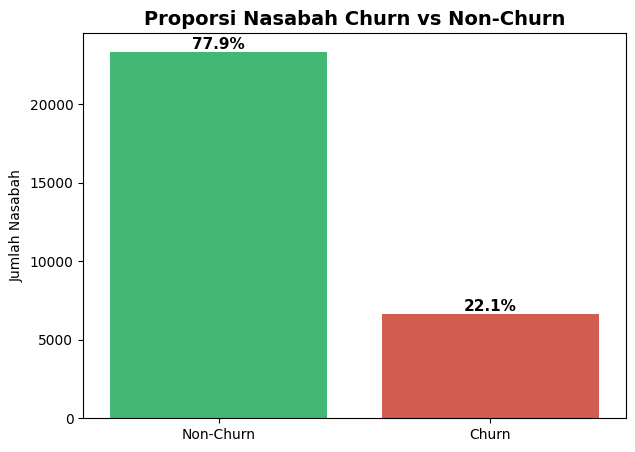

/tmp/ipython-input-8414216.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-8414216.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])


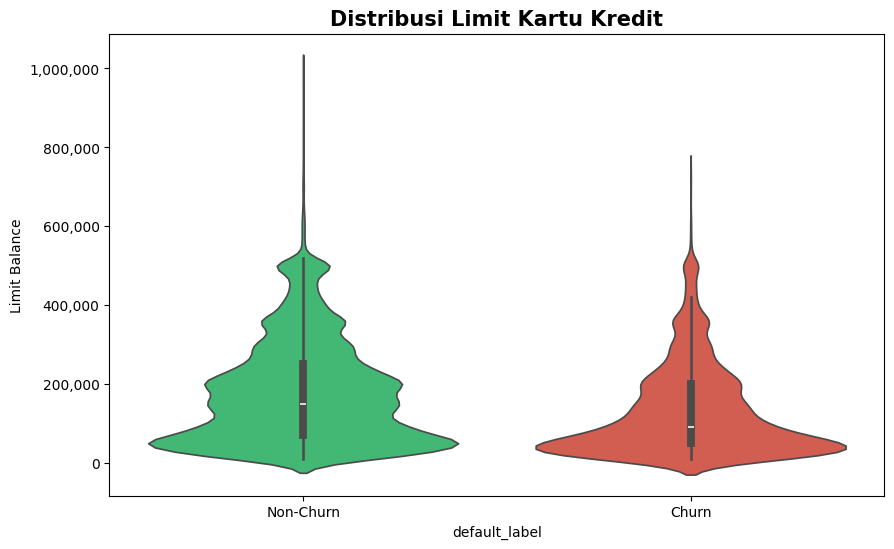

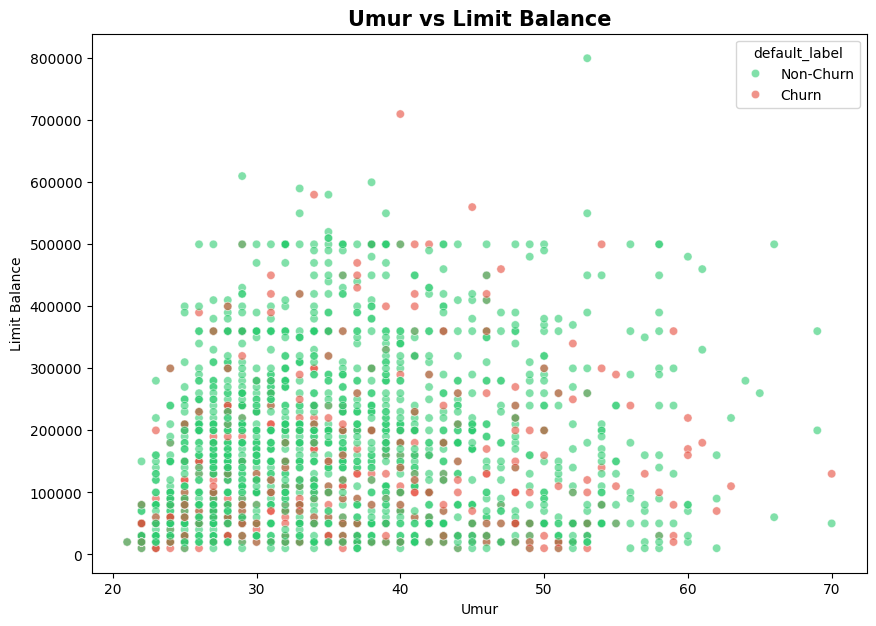

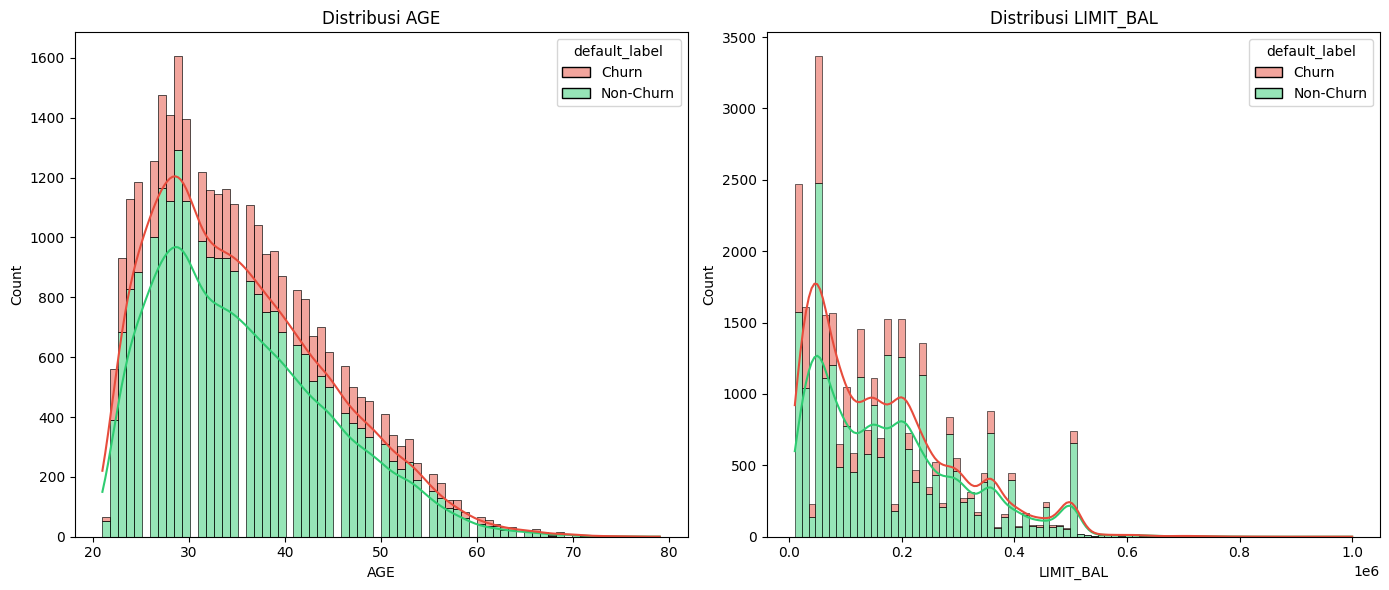

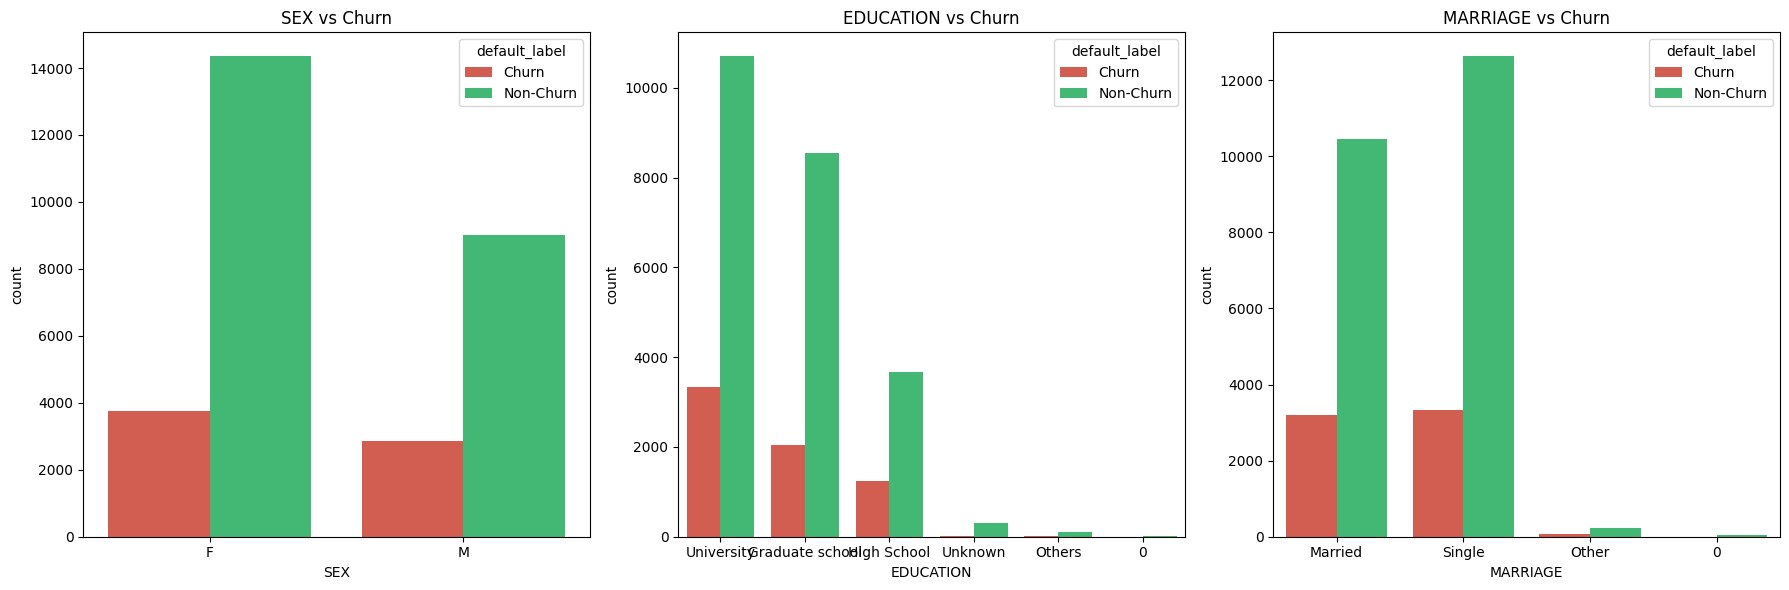

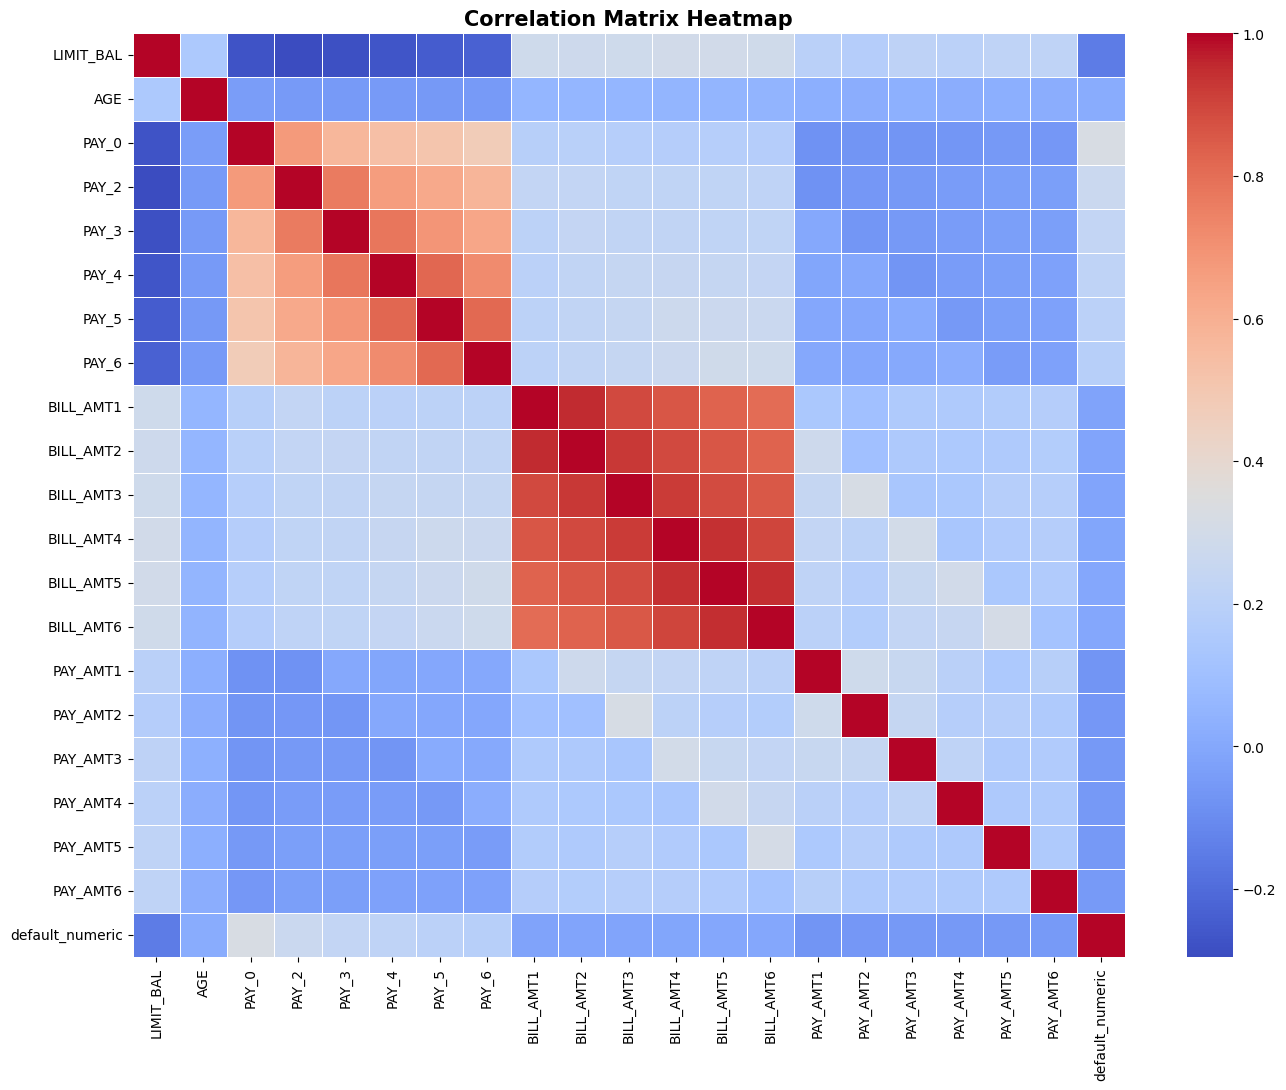

In [52]:
run_full_eda(data, show=True)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [79]:
# --- DEFINISI MAPPING KATEGORIKAL ---
# Dipisahkan di sini agar mudah diaudit dan diubah (Maintainability)
MAPPING_CONFIG = {
    'SEX': {
        'M': 1,
        'F': 2
    },
    'EDUCATION': {
        'Graduate school': 1,
        'University': 2,
        'High School': 3,
        'Unknown': 4,
        'Others': 4,
        '0': 4  # Menangani noise '0' sebagai kategori 'Others'
    },
    'MARRIAGE': {
        'Married': 1,
        'Single': 2,
        'Other': 3,
        '0': 3  # Menangani noise '0' sebagai kategori 'Other'
    },
    'default': {
        'Y': 1,
        'N': 0
    }
}


In [83]:
def preprocess_data(df_input: pd.DataFrame) -> pd.DataFrame:
    """
    Melakukan pembersihan data, standarisasi kolom, dan encoding variabel kategorikal.
    """
    if df_input is None:
        raise ValueError("Dataframe kosong. Jalankan ingest_data() terlebih dahulu.")

    logger.info("🚀 Memulai proses Preprocessing Data...")
    df = df_input.copy()

    # =====================================================
    # 1. STANDARDIZE COLUMN NAMES (ANTI SPASI SILUMAN)
    # =====================================================
    logger.info("Menstandarisasi nama kolom (strip + lower safety)...")
    df.columns = (
        df.columns
          .str.strip()
          .str.replace(r"\s+", " ", regex=True)
    )

    logger.debug(f"Daftar kolom setelah standarisasi: {list(df.columns)}")

    # Rename PAY_0 -> PAY_1 (UCI standard)
    if 'PAY_0' in df.columns:
        df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
        logger.info("Kolom 'PAY_0' diubah menjadi 'PAY_1'.")

    # =====================================================
    # 2. DROP KOLOM TIDAK RELEVAN
    # =====================================================
    if 'ID' in df.columns:
        df.drop(columns=['ID'], inplace=True)
        logger.info("Kolom 'ID' dihapus (identifier, bukan fitur).")

    # =====================================================
    # 3. CATEGORICAL ENCODING (ROBUST + AUDITABLE)
    # =====================================================
    for col, mapping_dict in MAPPING_CONFIG.items():
        if col not in df.columns:
            logger.warning(f"Kolom {col} tidak ditemukan, dilewati.")
            continue

        logger.info(f"Encoding kolom kategorikal: {col}")

        # Pastikan string dulu (anti 0 vs '0')
        df[col] = (
                    df[col]
                    .astype(str)
                    .str.strip()
                    .str.upper()
                  )


        # Audit nilai unik sebelum mapping
        before_vals = df[col].unique()
        logger.debug(f"{col} - unique sebelum mapping: {before_vals}")

        # Mapping
        df[col] = df[col].map(mapping_dict)

        # Deteksi mapping gagal
        nan_count = df[col].isna().sum()
        if nan_count > 0:
            logger.warning(
                f"{nan_count} nilai di kolom {col} tidak ter-mapping. "
                f"Mengisi dengan modus."
            )

            # Fallback aman
            if df[col].mode().empty:
                raise ValueError(f"Kolom {col} tidak memiliki nilai valid setelah mapping.")
            mode_val = int(df[col].mode()[0])
            df[col] = df[col].fillna(mode_val)

        df[col] = df[col].astype(int)

    # =====================================================
    # 4. FINAL TYPE CONVERSION (NUMERIC ONLY)
    # =====================================================
    logger.info("Konversi seluruh kolom ke numerik...")
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # =====================================================
    # 5. DROP UNEXPECTED NaN
    # =====================================================
    initial_len = len(df)
    df.dropna(inplace=True)

    dropped = initial_len - len(df)
    if dropped > 0:
        logger.warning(f"{dropped} baris dihapus karena NaN setelah konversi numerik.")

    # =====================================================
    # 6. FINAL SANITY CHECK
    # =====================================================
    if df.isna().any().any():
        raise ValueError("Masih terdapat NaN setelah preprocessing.")

    logger.info(f"✅ Preprocessing selesai | Shape akhir: {df.shape}")
    return df

In [87]:
set([repr(x) for x in data['SEX'].unique()])


{"'F'", "'M'"}

In [95]:
class ProjectConfig:
    OUTPUT_DIR = Path("output")
    DATASET_NAME = "namadataset"   # 🔥 ganti sesuai dataset

    PREPROCESSING_DIR = OUTPUT_DIR / f"{DATASET_NAME}_preprocessing"

    CLEAN_FILE_PATH = PREPROCESSING_DIR / "clean_data.csv"
    #MODEL_FILE_PATH = PREPROCESSING_DIR / "model_data.csv"


In [96]:
def save_data(clean_df: pd.DataFrame) -> None:
    """
    Menyimpan hasil data bersih ke direktori preprocessing dataset.
    """
    if clean_df is None:
        raise ValueError("Tidak ada data bersih untuk disimpan.")

    ProjectConfig.PREPROCESSING_DIR.mkdir(parents=True, exist_ok=True)

    try:
        clean_df.to_csv(ProjectConfig.CLEAN_FILE_PATH, index=False)
        logger.info(f"📁 Data bersih disimpan: {ProjectConfig.CLEAN_FILE_PATH}")

        #clean_df.to_csv(ProjectConfig.MODEL_FILE_PATH, index=False)
        #logger.info(f"📁 Salinan modeling disimpan: {ProjectConfig.MODEL_FILE_PATH}")

    except Exception:
        logger.exception("❌ Gagal menyimpan data bersih.")
        raise


In [88]:
preprocess_data(data)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,4,3,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,4,3,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,4,3,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,4,3,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,4,3,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,4,3,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,4,3,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,4,3,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,4,3,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [94]:
save_data(data)